# Exploratory Analysis of Genetech's Floodlight data

More infos are available at the website: https://floodlightopen.com/en-US/

App is downloadable for the iPhone:
https://itunes.apple.com/us/app/floodlight-open/id1365939494?ls=1&mt=8
Limited to specific App stores.

Questionable: Do you already a bias by limiting the study to a specific platform? Probaly lower bias as the technological bias in general. The median age is 44 (number with data from 12.09.2018). Average diagnosis age is around 30.
Also, much more women are affected.

Source code available at:
https://github.com/kohleman/genentech_floodlight

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt

plt.style.use('ggplot')

sns.set(color_codes=True)

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

%matplotlib inline

In [2]:
# Import the data, downloaded from here: https://dataset.floodlightopen.com/public-blobs-prod/complete_dataset.csv
# raw_df = pd.read_csv("C:\\Users\\MKO\\Downloads\\complete_dataset_04_02_2019.csv")
raw_df = pd.read_csv("C:\\Users\\MKO\\Downloads\\complete_dataset_04_06_2019.csv")

# Data structure
#### Each row is a data point

In [3]:
raw_df.head()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testMetricName,testResultMetricId,testResultMetricCreatedOn,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 15
0,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,Mood Response,115524,4/23/2018 12:22:57 AM +00:00,NaN,NaN,4.00,NaN
1,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,Mood Response,116040,4/25/2018 4:04:32 AM +00:00,NaN,NaN,5.00,NaN
2,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,Correct Responses,116041,4/25/2018 4:06:51 AM +00:00,NaN,NaN,16.00,NaN
3,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,Response Time Average,116042,4/25/2018 4:06:51 AM +00:00,NaN,NaN,0.94,NaN
4,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,IPS,Correct Responses,116043,4/25/2018 4:06:51 AM +00:00,NaN,NaN,39.00,NaN


# Latest entries are at the end

In [4]:
raw_df.tail()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testMetricName,testResultMetricId,testResultMetricCreatedOn,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 15
116696,FL72243836,6/3/2019 10:57:57 PM +00:00,False,US,female,1971,170.0,163.0,Draw A Shape,Hand Used,180376,6/3/2019 11:09:42 PM +00:00,NaN,NaN,1.00,NaN
116697,FL72243836,6/3/2019 10:57:57 PM +00:00,False,US,female,1971,170.0,163.0,Static Balance,Sway Path,180377,6/3/2019 11:11:05 PM +00:00,NaN,NaN,28.25,NaN
116698,FL72243836,6/3/2019 10:57:57 PM +00:00,False,US,female,1971,170.0,163.0,Five UTurn Test,Turns,180378,6/3/2019 11:12:50 PM +00:00,NaN,NaN,5.00,NaN
116699,FL72243836,6/3/2019 10:57:57 PM +00:00,False,US,female,1971,170.0,163.0,Five UTurn Test,Turn Speed Average,180379,6/3/2019 11:12:50 PM +00:00,NaN,NaN,0.40,NaN
116700,FL72243836,6/3/2019 10:57:57 PM +00:00,False,US,female,1971,170.0,163.0,Two Minute Walk Test,Steps,180380,6/3/2019 11:59:18 PM +00:00,NaN,NaN,10.00,NaN


# How many data points do we have in total?

In [5]:
# Total matrix size
raw_df.shape

(116701, 16)

In [6]:
# Doesn't make much sense, but for height and weight, Median of Birth Year is 1970
raw_df.describe()

,participantBirthYear,participantWeightLbs,participantHeightCms,testResultMetricId,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 15
count,116701.000000,116701.000000,116701.000000,116701.000000,0.0,0.0,116701.000000,0.0
mean,1971.426766,181.803241,163.674759,148611.347752,NaN,NaN,21.690916,NaN
std,14.568238,69.476586,36.241895,25744.576634,NaN,NaN,218.359949,NaN
min,1900.000000,3.000000,1.000000,59.000000,NaN,NaN,0.000000,NaN
25%,1961.000000,135.000000,161.000000,136167.000000,NaN,NaN,0.120000,NaN
50%,1970.000000,167.000000,170.000000,150871.000000,NaN,NaN,0.310000,NaN
75%,1981.000000,200.000000,178.000000,165793.000000,NaN,NaN,5.000000,NaN
max,2019.000000,530.000000,300.000000,180380.000000,NaN,NaN,22774.500000,NaN


# How many participants do we have in total?

In [7]:
print(f'Unique app users: {len(raw_df.floodlightOpenId.unique())}')

Unique app users: 791


# Where are they from?

In [8]:
# Where are they from?
unique_locations = raw_df.participantCountryOfResidence.unique()
print(f'Countries of study participants {unique_locations}')

# What? All are from a different location? 
# Not clear what kind of location this participantDemographicId is encoding. City? State?

Countries of study participants ['US' 'CA' 'CH' 'DK' 'GB' 'AU']


# Are there controls(healthy participants) in the study?

In [9]:
# What does this mean? Half of the participants are healthy?
raw_df.groupby('participantIsControl')['participantIsControl'].count()

participantIsControl
False    80491
True     36210
Name: participantIsControl, dtype: int64

In [10]:
raw_df.groupby('participantCountryOfResidence')['participantCountryOfResidence'].count()

participantCountryOfResidence
AU       38
CA    21366
CH     2036
DK      771
GB       28
US    92462
Name: participantCountryOfResidence, dtype: int64

In [11]:
raw_df.groupby('participantSex')['participantSex'].count()

participantSex
female    80468
male      36233
Name: participantSex, dtype: int64

In [12]:
# The first 10 columns do not change, over time. This is basically master data and is redundant information.
# As this is eventually put into MongoDB, it might be OK in this format.

masterdata_df = raw_df.iloc[:,0:8]
unique_individuals = masterdata_df.drop_duplicates()

In [13]:
unique_individuals.head()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms
0,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0
33,FL73404300,4/23/2018 1:40:01 AM +00:00,True,US,female,1964,139.0,168.0
66,FL33016915,4/23/2018 6:11:44 AM +00:00,True,US,male,1963,190.0,178.0
92,FL26992374,4/23/2018 11:43:21 AM +00:00,True,US,male,1997,195.0,188.0
173,FL87030061,4/23/2018 3:03:40 PM +00:00,True,US,male,1972,134.0,166.0


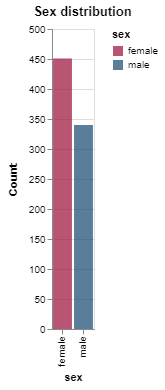

In [14]:
scale = alt.Scale(domain=['female', 'male'],
                  range=['#9c0d38', '#14476F'])

chart = alt.Chart(unique_individuals).mark_bar().encode(
    x=alt.Y('participantSex:N',
        axis=alt.Axis(title="sex")
    ),
    y=alt.Y('count():Q',
        axis=alt.Axis(title="Count")
    ),
    color=alt.Color('participantSex', legend=alt.Legend(title='sex'), scale=scale),
    opacity=alt.value(0.7),
    
).properties(
    title='Sex distribution')

chart

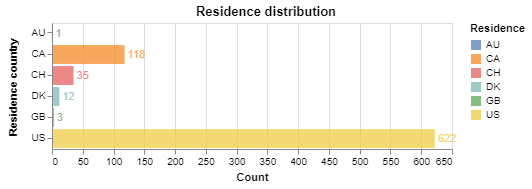

In [15]:
residenceChart = alt.Chart(unique_individuals).mark_bar().encode(
    y=alt.Y('participantCountryOfResidence:N',
        axis=alt.Axis(title="Residence country")
    ),
    x=alt.Y('count():Q',
        axis=alt.Axis(title="Count")
    ),
    color=alt.Color('participantCountryOfResidence', legend=alt.Legend(title='Residence')),
    opacity=alt.value(0.7),
    
).properties(
    title='Residence distribution')

residenceText = residenceChart.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count():Q'
)

residenceChart + residenceText

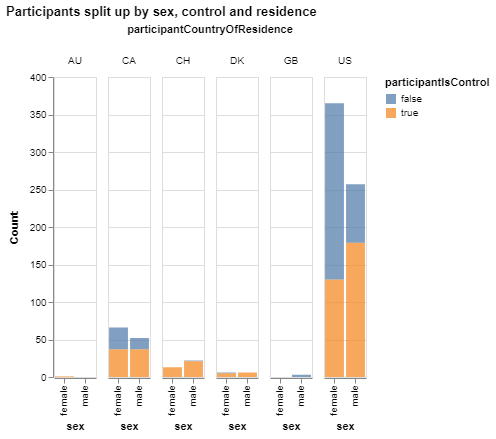

In [16]:
residenceSexChart = alt.Chart(unique_individuals).mark_bar().encode(
    x=alt.X('participantSex:O',
        axis=alt.Axis(title="sex")
    ),
    y=alt.Y('count():Q',
        axis=alt.Axis(title="Count")
    ),
    opacity=alt.value(0.7),
    color='participantIsControl:N',
    column='participantCountryOfResidence:N'
).properties(
    title='Participants split up by sex, control and residence')

residenceSexChart

# Birth year distribution

In [17]:
# aggregate participants per birth year
birthYear = raw_df.groupby('participantBirthYear')['floodlightOpenId'].nunique()

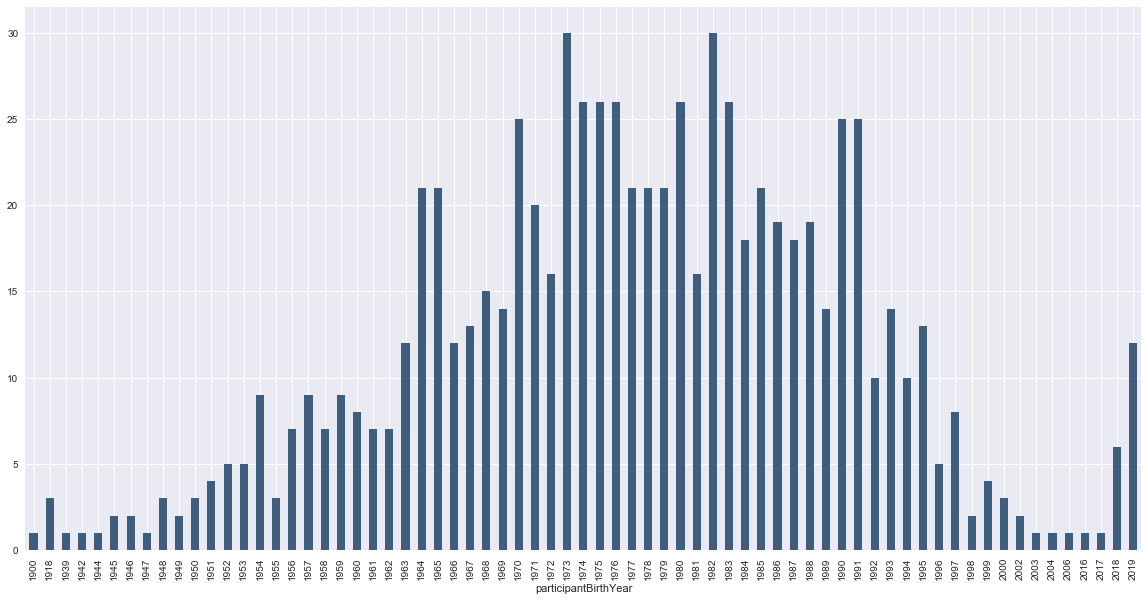

In [18]:
# have a visual view, value 2016 is a 'mistake' I guess
birthYear.plot(kind="bar", figsize= (20,10), color="#3F5D7D")
# Default value is set to the current year 

# A look at the height distribution

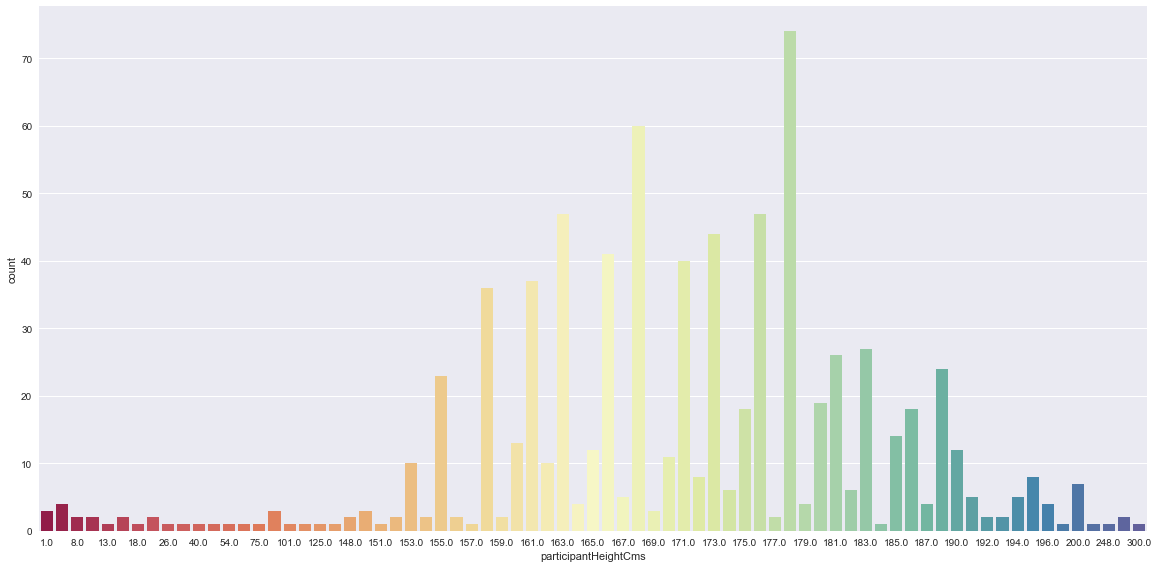

In [19]:

g = sns.factorplot(x="participantHeightCms", data=unique_individuals, kind="count",
                   palette="Spectral", size=8, aspect=2)
g.set_xticklabels(step=2)

# Why are so many 178 cm? Is this the default value in the app? Should be more bell shaped
# Why are there these gaps?
# Apparently most participants are from the US, there they enter the height in feet which is probably rounded to cm (Checked this in the app)


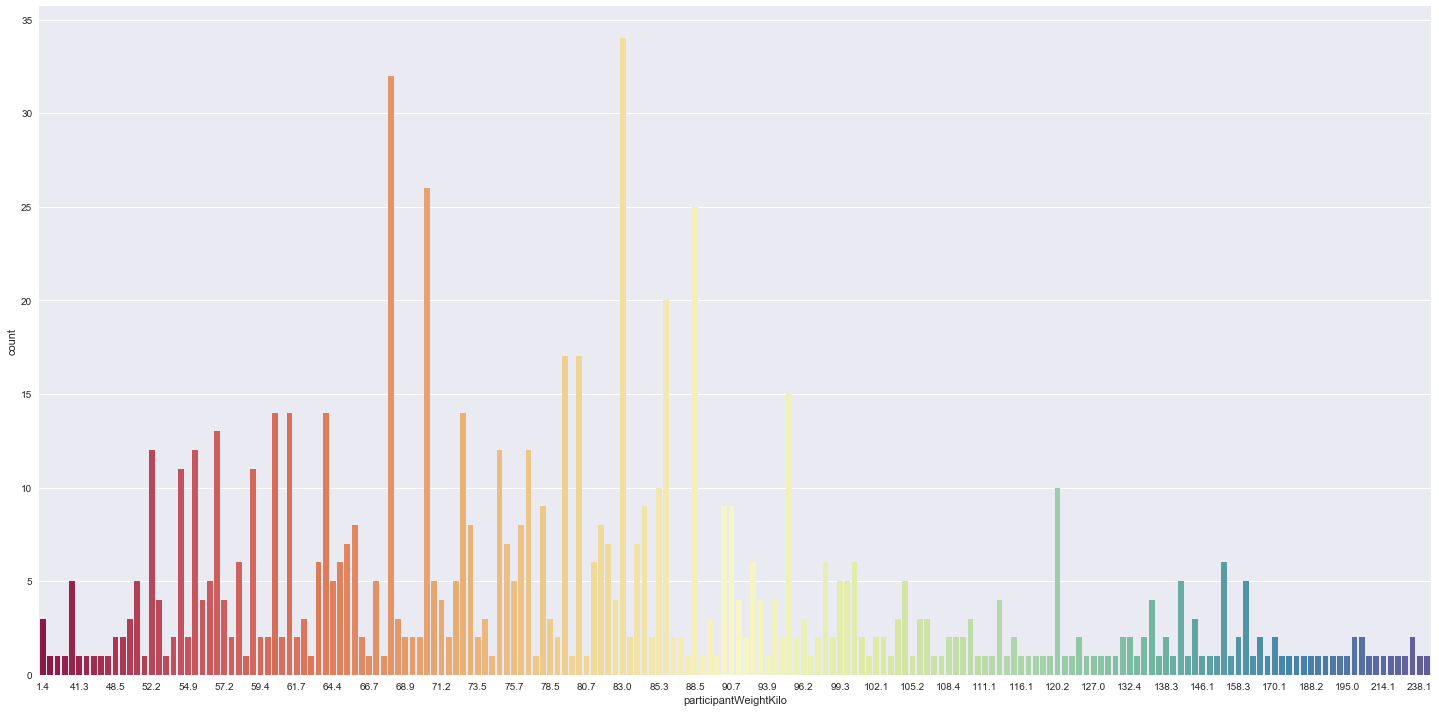

In [20]:
# convert from lbs to kilos and add as separate column
unique_individuals = unique_individuals.assign(participantWeightKilo = lambda x: np.around(0.453592*(x.participantWeightLbs),1))

# have a look at the height
g = sns.factorplot(x="participantWeightKilo", data=unique_individuals, kind="count",
                   palette="Spectral", size=10, aspect=2)
g.set_xticklabels(step=5)

# Again, 83 kilos is the default??
# --> Looks like there ar e at least more than 10 people who might not give correct height and weight

In [21]:
raw_df.get_dtype_counts()

float64    6
int64      2
bool       1
object     7
dtype: int64

In [22]:
grouped = masterdata_df.groupby("floodlightOpenId")

In [23]:
raw_df.index

RangeIndex(start=0, stop=116701, step=1)

In [24]:
testMetric = raw_df.groupby('testMetricName')['floodlightOpenId'].nunique()

In [25]:
testMetric

testMetricName
Bottom To Top Hausdorff Distance Best    665
Circle Hausdorff Distance Best           664
Correct Responses                        676
Figure 8 Hausdorff Distance Best         665
Hand Used                                670
Life Space Daily                         628
Mean Hausdorff Distance Best             669
Mood Response                            736
Number of shapes drawn correctly         665
Response Time Average                    676
Spiral Hausdorff Distance Best           665
Square Hausdorff Distance Best           664
Steps                                    262
Successful Pinches                       671
Sway Path                                601
Top to bottom Hausdorff Distance Best    665
Turn Speed Average                       531
Turns                                    531
Name: floodlightOpenId, dtype: int64

In [26]:
datapoints_per_id = raw_df.groupby('floodlightOpenId')['testResultMetricId'].count()

In [27]:
# Top datapoint producers
datapoints_per_id.sort_values(ascending=False).head()

floodlightOpenId
FL62823849    3813
FL78276357    3372
FL31933896    3299
FL38499919    2964
FL26978690    2412
Name: testResultMetricId, dtype: int64

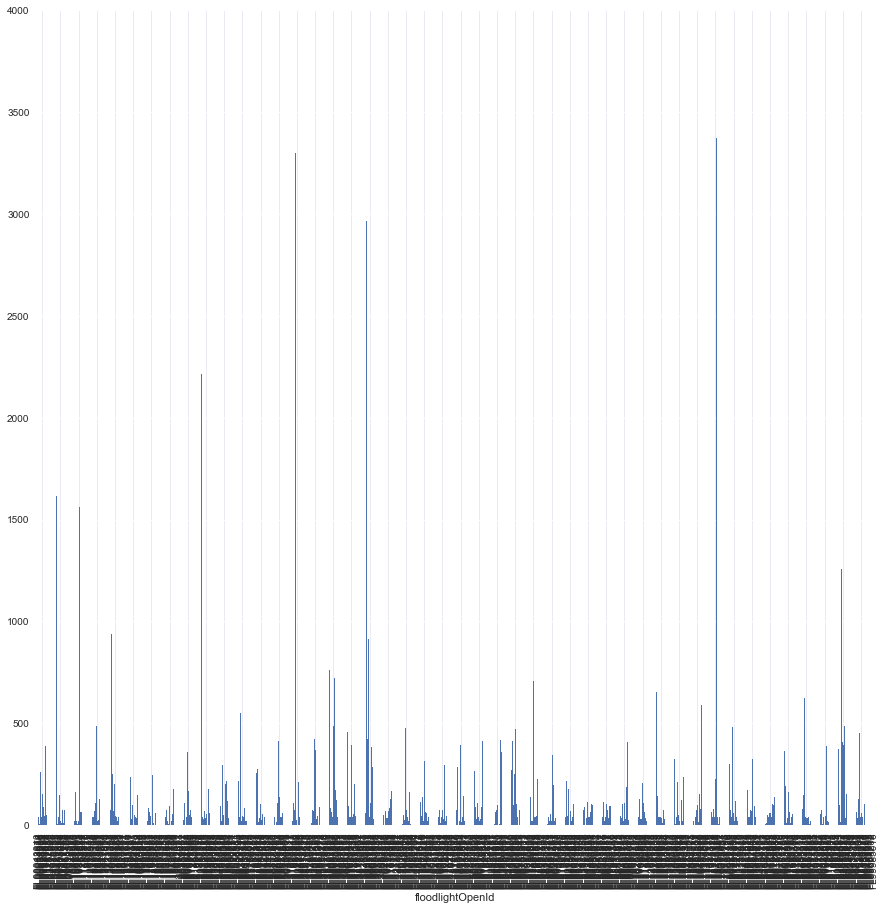

In [28]:
datapoints_per_id.plot(kind="bar", figsize= (15,15))

In [29]:
datapoints_per_id.describe()

count     791.000000
mean      147.536030
std       337.618635
min         1.000000
25%        32.000000
50%        52.000000
75%       121.000000
max      3813.000000
Name: testResultMetricId, dtype: float64

In [32]:
unique_individuals.head()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,participantWeightKilo
0,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,72.1
33,FL73404300,4/23/2018 1:40:01 AM +00:00,True,US,female,1964,139.0,168.0,63.0
66,FL33016915,4/23/2018 6:11:44 AM +00:00,True,US,male,1963,190.0,178.0,86.2
92,FL26992374,4/23/2018 11:43:21 AM +00:00,True,US,male,1997,195.0,188.0,88.5
173,FL87030061,4/23/2018 3:03:40 PM +00:00,True,US,male,1972,134.0,166.0,60.8


In [31]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'